# Meta Methods

In [2]:
# Import libraries 
import pandas as pd   # Optional: good package for manipulating data 
import sklearn  # Package with learning algorithms implemented

dfTrain = pd.read_csv(r'..\Datasets\training-dataset-reduced.csv')
dfTest = pd.read_csv(r'..\Datasets\testing-dataset-reduced.csv')

#Remove id

dfTrain = dfTrain.iloc[: , 1:]
dfTest = dfTest.iloc[: , 1:]
X_train, y_train = dfTrain.drop('y', axis=1), dfTrain["y"]
X_test, y_test = dfTest.drop('y', axis=1), dfTest["y"]

display(dfTrain.head())
display(dfTest.head())

,age,campaign,cons.conf.idx,cons.price.idx,contact,day_of_week,default_unknown,default_yes,duration,education_basic.6y,...,marital_married,marital_single,marital_unknown,month,nr.employed,pdays,poutcome_nonexistent,poutcome_success,previous,y
0,0.419753,0.036364,0.602510,0.698753,1.0,0.75,0.0,0.0,0.707998,0.0,...,1.0,0.0,0.0,0.222222,0.859735,1.0,1.0,0.0,0.0,0.0
1,0.246914,0.127273,0.338912,0.669135,0.0,0.75,0.0,0.0,0.427908,0.0,...,1.0,0.0,0.0,0.444444,1.000000,1.0,1.0,0.0,0.0,0.0
2,0.185185,0.000000,0.602510,0.698753,1.0,0.25,1.0,0.0,0.667382,1.0,...,1.0,0.0,0.0,0.222222,0.859735,1.0,1.0,0.0,0.0,0.0
3,0.407407,0.000000,0.376569,0.882307,1.0,0.75,0.0,0.0,0.525348,0.0,...,1.0,0.0,0.0,0.333333,1.000000,1.0,1.0,0.0,0.0,0.0
4,0.370370,0.054545,0.418410,0.296960,0.0,0.00,0.0,0.0,0.646660,0.0,...,0.0,1.0,0.0,0.333333,0.425709,1.0,1.0,0.0,0.0,1.0


,age,campaign,cons.conf.idx,cons.price.idx,contact,day_of_week,default_unknown,default_yes,duration,education_basic.6y,...,marital_married,marital_single,marital_unknown,month,nr.employed,pdays,poutcome_nonexistent,poutcome_success,previous,y
0,0.098765,0.072727,0.154812,0.340608,0.0,0.0,0.0,0.0,0.638682,0.0,...,0.0,0.0,0.0,0.111111,0.512287,1.0,1.0,0.0,0.0,1.0
1,0.209877,0.000000,0.192469,0.269680,0.0,1.0,0.0,0.0,0.475605,0.0,...,0.0,1.0,0.0,0.222222,0.512287,1.0,1.0,0.0,0.0,0.0
2,0.518519,0.000000,0.602510,0.698753,1.0,0.0,1.0,0.0,0.378653,0.0,...,1.0,0.0,0.0,0.222222,0.859735,1.0,1.0,0.0,0.0,0.0
3,0.296296,0.018182,0.192469,0.269680,0.0,1.0,1.0,0.0,0.558171,0.0,...,1.0,0.0,0.0,0.222222,0.512287,1.0,1.0,0.0,0.0,0.0
4,0.395062,0.000000,0.602510,0.698753,1.0,1.0,0.0,0.0,0.579618,0.0,...,0.0,0.0,0.0,0.222222,0.859735,1.0,1.0,0.0,0.0,0.0


### cv value (number of partitions of k-fold cross validation): 

In [3]:
cv = 10

## Voting

#### Prepare and test the classifiers we will use with voting (naive bayes, knn and decision trees):

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as  plt
from sklearn.metrics import classification_report

clf1 = GaussianNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))

Best Params fo Knn= {'n_neighbors': 29, 'weights': 'distance'} Accuracy= 0.7393125509317413
Accuracy: 0.713 [Naive Bayes]
Accuracy: 0.739 [Knn (3)]
Accuracy: 0.842 [Dec. Tree]


#### Test the voting algorithm with different parameters: 

Hard voting (majority voting)

In [30]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))


Accuracy: 0.786 [Majority Voting]


Soft voting (Weighted voting)

In [31]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,2])
scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting -> Weights: nb=2, knn3=1, dt=2"))

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[1,2,2])
scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting -> Weights: nb=1, knn3=2, dt=2"))

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[1,2,3])
scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting -> Weights: nb=1, knn3=2, dt=3"))

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,3])
scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting -> Weights: nb=2, knn3=1, dt=3"))

Accuracy: 0.810 [Weighted Voting -> Weights: nb=2, knn3=1, dt=2]
Accuracy: 0.837 [Weighted Voting -> Weights: nb=1, knn3=2, dt=2]
Accuracy: 0.843 [Weighted Voting -> Weights: nb=1, knn3=2, dt=3]
Accuracy: 0.837 [Weighted Voting -> Weights: nb=2, knn3=1, dt=3]


#### Print extra information for the best execution of the above ones (confusion matrix, classification report): 

Best execution: Soft voting, Weights: nb=1, knn3=2, dt=3"

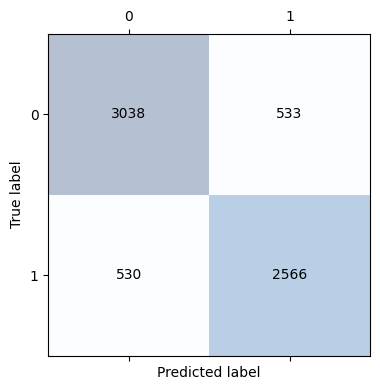

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      3571
         1.0       0.83      0.83      0.83      3096

    accuracy                           0.84      6667
   macro avg       0.84      0.84      0.84      6667
weighted avg       0.84      0.84      0.84      6667



In [32]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[1,2,3])
predicted = cross_val_predict(eclf, X=X_train, y=y_train,  cv=cv) #to get the perfomance of the predictions depending on the value of the predicted variable

#print the confusion matrix
confmat = confusion_matrix(y_train, predicted)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

#print the classification report
print(classification_report(y_train, predicted))


## Bagging

We are gonna use bagging with decision trees as it is one of the algorothms that performs best.

#### Test the bagging algorithm with different parameters: varying the number of estimators and the maxinmum number of features

In [34]:
from sklearn.ensemble import BaggingClassifier


print("With default max_features=1.0, and varying the number of estimators: ")
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest), X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
    print("\tAccuracy: %0.3f [%s]" % (scores.mean(), nest))


print("\nWith max_features=0.75, and varying the number of estimators: ")
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.75), X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
    print("\tAccuracy: %0.3f [%s]" % (scores.mean(), nest))


print("\nWith max_features=0.5, and varying the number of estimators: ")
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.5), X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
    print("\tAccuracy: %0.3f [%s]" % (scores.mean(), nest))


print("\nWith max_features=0.35, and varying the number of estimators: ")
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
    print("\tAccuracy: %0.3f [%s]" % (scores.mean(), nest))


print("\nWith max_features=0.25, and varying the number of estimators: ")
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.25), X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
    print("\tAccuracy: %0.3f [%s]" % (scores.mean(), nest))

With default max_features=1.0, and varying the number of estimators: 
	Accuracy: 0.827 [1]
	Accuracy: 0.808 [2]
	Accuracy: 0.867 [5]
	Accuracy: 0.874 [10]
	Accuracy: 0.883 [20]
	Accuracy: 0.885 [50]
	Accuracy: 0.887 [100]
	Accuracy: 0.889 [200]

With max_features=0.75, and varying the number of estimators: 
	Accuracy: 0.790 [1]
	Accuracy: 0.772 [2]
	Accuracy: 0.843 [5]
	Accuracy: 0.868 [10]
	Accuracy: 0.881 [20]
	Accuracy: 0.885 [50]
	Accuracy: 0.887 [100]
	Accuracy: 0.886 [200]

With max_features=0.5, and varying the number of estimators: 
	Accuracy: 0.754 [1]
	Accuracy: 0.743 [2]
	Accuracy: 0.809 [5]
	Accuracy: 0.834 [10]
	Accuracy: 0.854 [20]
	Accuracy: 0.868 [50]
	Accuracy: 0.861 [100]
	Accuracy: 0.866 [200]

With max_features=0.35, and varying the number of estimators: 
	Accuracy: 0.684 [1]
	Accuracy: 0.712 [2]
	Accuracy: 0.792 [5]
	Accuracy: 0.824 [10]
	Accuracy: 0.832 [20]
	Accuracy: 0.823 [50]
	Accuracy: 0.826 [100]
	Accuracy: 0.829 [200]

With max_features=0.25, and varying th

#### Print extra information for the best execution of the above ones (confusion matrix, classification report): 

Best execution: default max_features: 1.0, number of estimators: 200

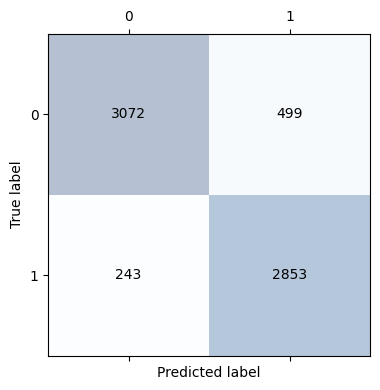

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89      3571
         1.0       0.85      0.92      0.88      3096

    accuracy                           0.89      6667
   macro avg       0.89      0.89      0.89      6667
weighted avg       0.89      0.89      0.89      6667



In [35]:
predicted = cross_val_predict(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=200), X_train, y_train, cv=cv) #to get the perfomance of the predictions depending on the value of the predicted variable

#print the confusion matrix
confmat = confusion_matrix(y_train, predicted)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

#print the classification report
print(classification_report(y_train, predicted))


## Random Forest

Now we are going to execute the random forest algorithm and see the confusion matrix, the accuracy, the precision, the recall and the f-measure.

Confusion matrix:


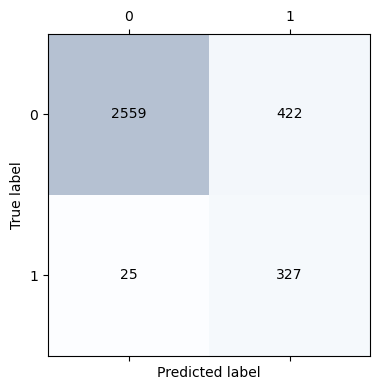

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      2981
         1.0       0.44      0.93      0.59       352

    accuracy                           0.87      3333
   macro avg       0.71      0.89      0.76      3333
weighted avg       0.93      0.87      0.89      3333



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

#print the confusion matrix
confmat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)
print("Confusion matrix:")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(y_test, pred))

Now we are going to try with ExtraTreesClassifier in order to introduce more randomness in the random trees, to see if it improves the results although these are quite good results.

Confusion matrix:


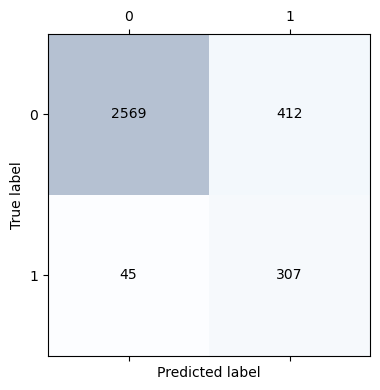

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      2981
         1.0       0.43      0.87      0.57       352

    accuracy                           0.86      3333
   macro avg       0.70      0.87      0.75      3333
weighted avg       0.92      0.86      0.88      3333



In [17]:
from sklearn.ensemble import ExtraTreesClassifier

rfc = ExtraTreesClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

#print the confusion matrix
confmat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)
print("Confusion matrix:")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(y_test, pred))

## Boosting

Last but not least, the next metalearning method we are going to execute is the boosting method. We will use adaboosting with decision trees with 1 and then 5 max depth, and also gradient boosting classifier with max depth 1.

Confusion matrix:


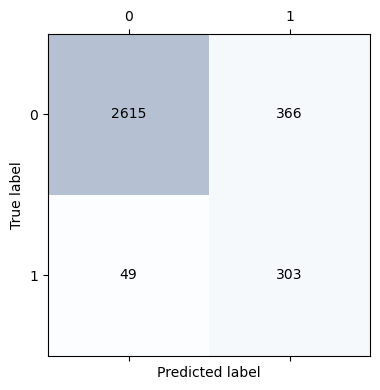

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      2981
         1.0       0.45      0.86      0.59       352

    accuracy                           0.88      3333
   macro avg       0.72      0.87      0.76      3333
weighted avg       0.93      0.88      0.89      3333



In [12]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=250)
abc.fit(X_train, y_train)
pred = abc.predict(X_test)

#print the confusion matrix
confmat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)
print("Confusion matrix:")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(y_test, pred))

Now we are going to try boosting with decision tree classifiers with depth = 5

Confusion matrix:


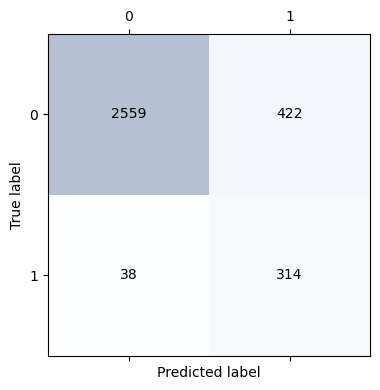

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      2981
         1.0       0.43      0.89      0.58       352

    accuracy                           0.86      3333
   macro avg       0.71      0.88      0.75      3333
weighted avg       0.93      0.86      0.88      3333



In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=250)
abc.fit(X_train, y_train)
pred = abc.predict(X_test)

#print the confusion matrix
confmat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)
print("Confusion matrix:")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(y_test, pred))

Now we are going to try gradient boosting classifier with 250 classifiers

Confusion matrix:


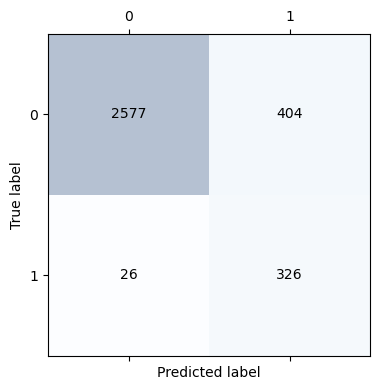

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      2981
         1.0       0.45      0.93      0.60       352

    accuracy                           0.87      3333
   macro avg       0.72      0.90      0.76      3333
weighted avg       0.93      0.87      0.89      3333



In [15]:
from sklearn.ensemble import GradientBoostingClassifier

abc = GradientBoostingClassifier(n_estimators=250)
abc.fit(X_train, y_train)
pred = abc.predict(X_test)

#print the confusion matrix
confmat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)
print("Confusion matrix:")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(y_test, pred))